In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df_store = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv', encoding='latin1')

In [4]:
df_store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# General information about the dataset
df_store.info

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

In [6]:
# Check for missing values
df_store.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
# Filling missed values in the Sales column with the median by category
df_store['Sales'] = df_store.groupby('Sub-Category')['Sales'].transform(
    lambda x: x.fillna(x.median()))


In [8]:
# Describe dataset
df_store.describe

<bound method NDFrame.describe of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520    

In [9]:
df_store.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

**Change data types to more suitable ones**


* Order date
* Ship date


In [10]:
df_store['Order Date']=pd.to_datetime(df_store['Order Date'], format='%m/%d/%Y')
df_store['Ship Date']=pd.to_datetime(df_store['Ship Date'], format='%m/%d/%Y')

Changing the format of the Sales column to easier to understand as a monetary value

In [11]:
# Let's make sure the Sales column is float
df_store['Sales'] = pd.to_numeric(df_store['Sales'], errors='coerce')


In [12]:
# Format to display as a monetary amount
df_store['Sales_formatted'] = df_store['Sales'].apply(lambda x: '${:,.2f}'.format(x))

In [13]:
pd.options.display.float_format = '${:,.2f}'.format

In [14]:
# Add Profit and Discount
# Checking this columns are Float
df_store['Profit'] = pd.to_numeric(df_store['Profit'], errors='coerce')
df_store['Discount'] = pd.to_numeric(df_store['Discount'], errors='coerce')

In [15]:
# Formating versions for display
df_store['Profit_formatted'] = df_store['Profit'].apply(lambda x: '${:,.2f}'.format(x))
df_store['Discount_percent'] = df_store['Discount'].apply(lambda x: '{:.0%}'.format(x))

📊 **Visualization of distribution**

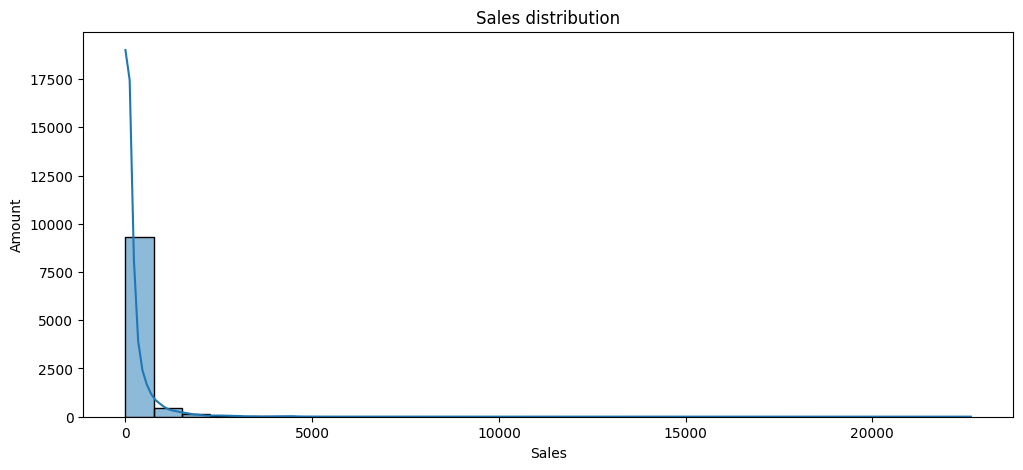

In [16]:
# Distribution of Sales
plt.figure(figsize=(12, 5))
sns.histplot(df_store['Sales'], kde=True, bins=30)
plt.title('Sales distribution')
plt.xlabel('Sales')
plt.ylabel('Amount')
plt.show()

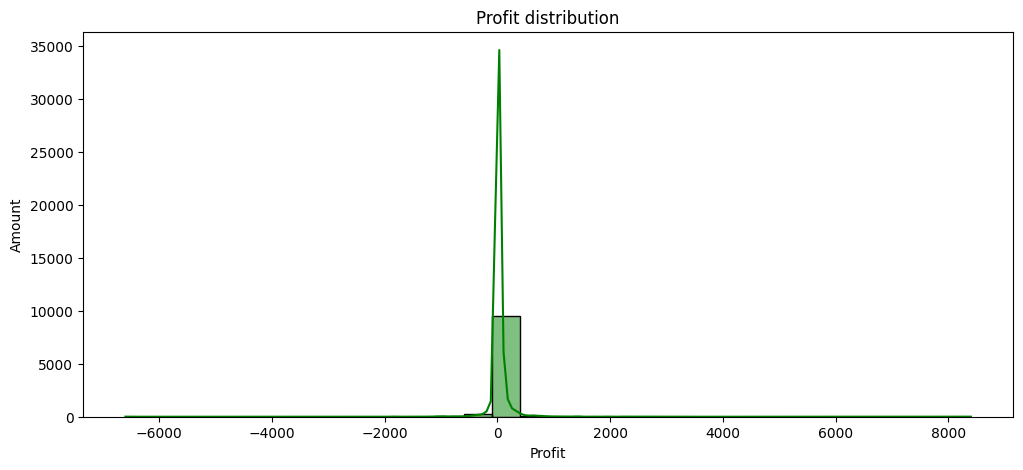

In [17]:
# Distribution of Profit
plt.figure(figsize=(12, 5))
sns.histplot(df_store['Profit'], kde=True, color='green', bins=30)
plt.title('Profit distribution')
plt.xlabel('Profit')
plt.ylabel('Amount')
plt.show()

In [1]:
# Visualization with Plotly
fig = px.bar(df_store.groupby('Region')['Sales'].sum().reset_index(), 
             x='Region', y='Sales', 
             title='Total sales by region', 
             text_auto='.2s')
fig.show()


NameError: name 'px' is not defined

📦**Categorical analysis**

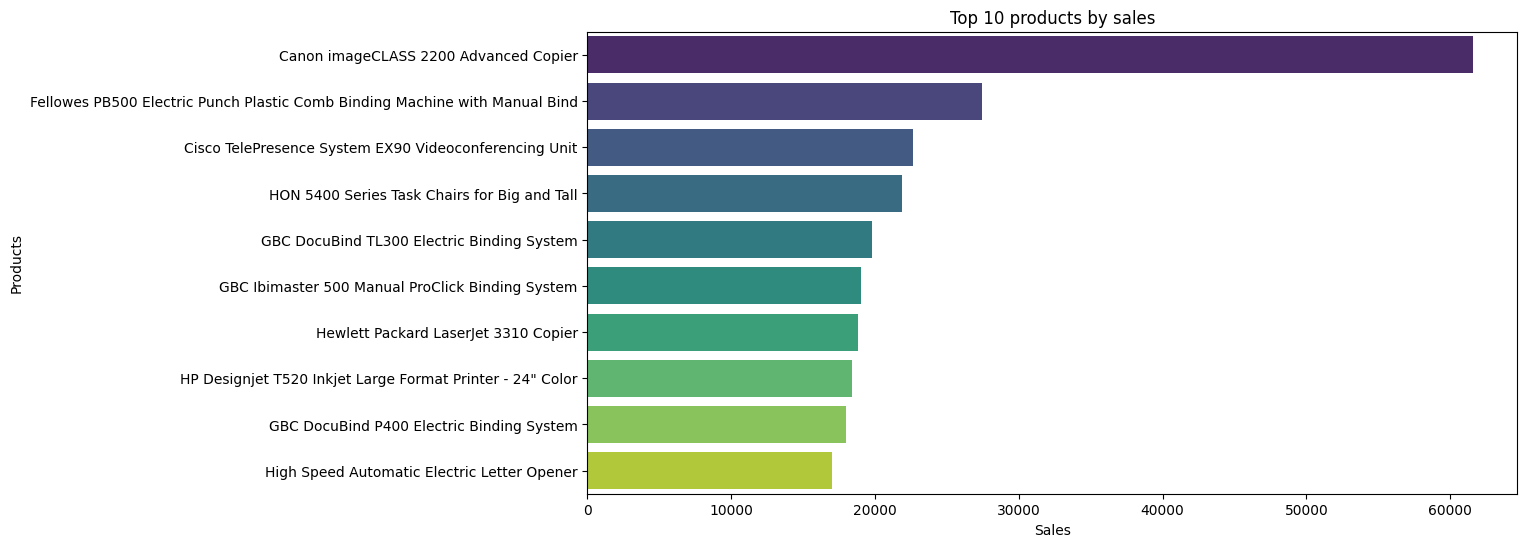

In [19]:
# Top 10 products by sales
top_products = df_store.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 products by sales')
plt.xlabel('Sales')
plt.ylabel('Products')
plt.show()


**Analysis of losing trades**

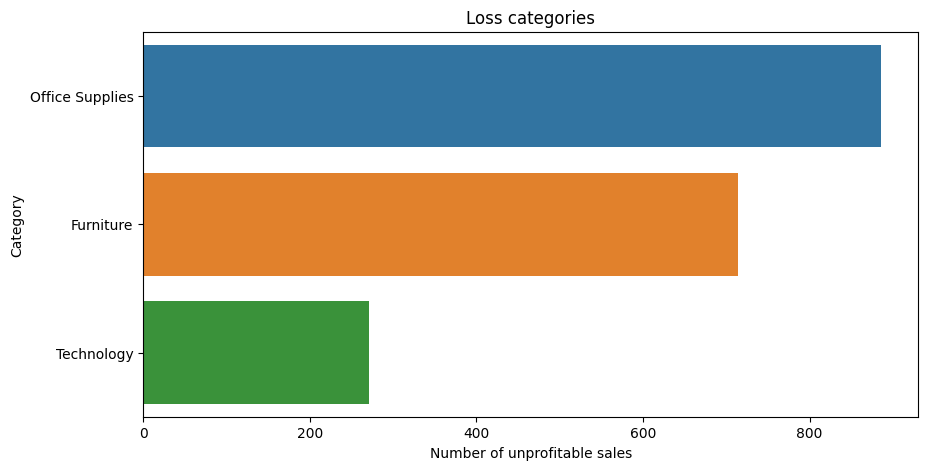

In [20]:
# Which categories are more likely to be at a loss?
losses = df_store[df_store['Profit'] < 0]
plt.figure(figsize=(10, 5))
sns.countplot(data=losses, y='Category', order=losses['Category'].value_counts().index)
plt.title('Loss categories')
plt.xlabel('Number of unprofitable sales')
plt.ylabel('Category')
plt.show()


📅**Time trend**

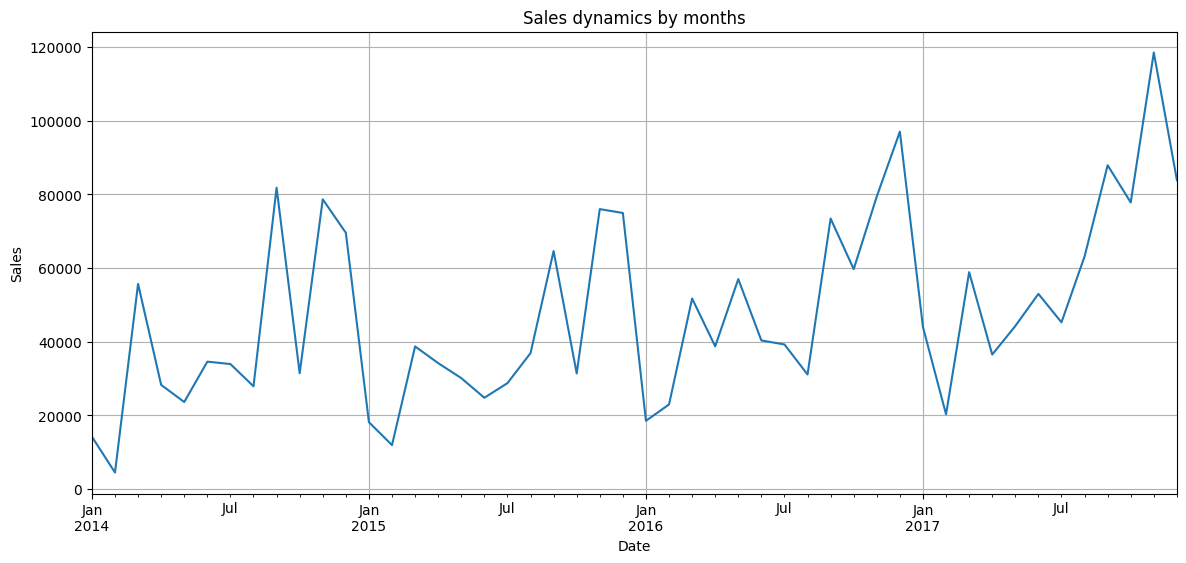

In [21]:
# Convert the Order Date column to datetime
df_store['Order Date'] = pd.to_datetime(df_store['Order Date'])

# Sales by month
df_store.set_index('Order Date', inplace=True)
monthly_sales = df_store['Sales'].resample('M').sum()

plt.figure(figsize=(14, 6))
monthly_sales.plot()
plt.title('Sales dynamics by months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()


**Exploratory Analysis**

Relationships and patterns between the variables

In [22]:
df_store.groupby('Category').Sales.sum()

Category
Furniture         $741,999.80
Office Supplies   $719,047.03
Technology        $836,154.03
Name: Sales, dtype: float64

In [23]:
df_store.groupby('Category').Sales.mean()

Category
Furniture         $349.83
Office Supplies   $119.32
Technology        $452.71
Name: Sales, dtype: float64

## 📊 Data Preparation Stages (Superstore Dataset)

### 🗂️ General Information:
- Superstore dataset with Kaggle was used.
- Initial review and analysis of the data structure was done.

### ✅ What was done:

1. **Reviewed first rows and table structure** to understand columns and data types.
2. **Detected missing values** - 468 missing values were found in the `Sales` column.
3. **Missing values in `Sales` are replaced by median** to maintain the stability of the distribution.
4. **Created a new column with formatted sales values** for better display (e.g.: 1,234.56).
5. **Changed data types to more appropriate:**
   - `Order Date` and `Ship Date` converted to date format (`datetime`) to be used in temporal analysis.
6. **Distribution Visualization:**
   - Plots of the distribution of `Sales`, `Profit` and other numerical attributes are plotted.
   - Outliers and distribution features are identified.

---

✅ The data are cleaned and ready for further analysis and construction of new visualizations.
